# Find suitable coordinates in switzerland

 - Data comes from http://thematicmapping.org/downloads/world_borders.php
 - Download link https://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
 - Put the file into "../data"

In [1]:
!pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.4 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 32.0 MB/s eta 0:00:0000:0100:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)


In [2]:
import zipfile
import tempfile
import urllib
from pathlib import Path

import matplotlib.pyplot as plt
import geopandas
import shapely
import numpy as np

%matplotlib inline

In [3]:
with tempfile.TemporaryDirectory() as tdir:
    with zipfile.ZipFile("../data/TM_WORLD_BORDERS-0.3.zip","r") as zfh:
        if False:
            with zfh.open("Readme.txt", "r") as fh:
                print(fh.read().decode("ascii",errors="replace"))
        print("\n".join(f"{f.filename:20s}: {f.file_size}" for f in zfh.filelist))
        zfh.extractall(tdir)
    shape = geopandas.read_file(tdir+"/TM_WORLD_BORDERS-0.3.shp", driver="ESRI Shapefile")


Readme.txt          : 2962
TM_WORLD_BORDERS-0.3.dbf: 24740
TM_WORLD_BORDERS-0.3.prj: 145
TM_WORLD_BORDERS-0.3.shp: 6478464
TM_WORLD_BORDERS-0.3.shx: 2068


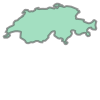

In [4]:
switzerland = shape[shape.NAME=="Switzerland"].geometry.item()
switzerland

## Select N random points within switzerland

In [5]:
N = 20

lonmin,latmin,lonmax,latmax = switzerland.bounds

rgen = np.random.default_rng(seed=42)
points = []

while len(points) < N:
    point = tuple(rgen.uniform(low=(lonmin,latmin),high=(lonmax,latmax)))
    inside = switzerland.contains(shapely.Point(*point))
    if inside:
        points.append(point)
        
points = np.array(points)
print(points.shape)

(20, 2)


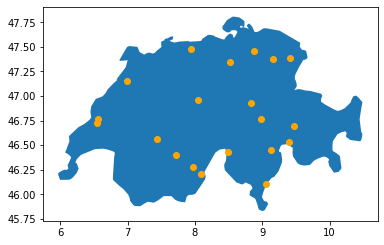

In [6]:
fig = shape[shape.NAME=="Switzerland"].plot()
fig.plot(*points.T,"o",c="orange")

## Select a grid of points within switzerland

In [7]:
lonmin,latmin,lonmax,latmax = switzerland.bounds

earth_radius = 6300
distance = 37

dlat = distance/earth_radius * 180/np.pi
dlon = dlat / np.cos(47*np.pi/180)
print(f"{dlon=} {dlat=}")

candidate_points = np.array(np.meshgrid(
    np.linspace(lonmin,lonmax,int(round((lonmax-lonmin)/dlon))),
    np.linspace(latmin,latmax,int(round((latmax-latmin)/dlat))),
))
print(candidate_points.shape)
points = []
for p in candidate_points.reshape(2,-1).T:
    inside = switzerland.contains(shapely.Point(*p))
    if inside:
        points.append(p)
        
points = np.array(points)
print(points.shape)

dlon=0.4934015127343023 dlat=0.33649902253715014
(2, 6, 9)
(20, 2)


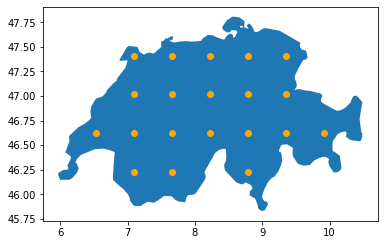

In [8]:
fig = shape[shape.NAME=="Switzerland"].plot()
fig.plot(*points.T,"o",c="orange")

In [9]:
for k,(lon,lat) in enumerate(points):
    print(f'    "grid{k:02d}": ({lon:5.2f}, {lat:4.2f}),')

    "grid00": ( 7.10, 46.22),
    "grid01": ( 7.66, 46.22),
    "grid02": ( 8.79, 46.22),
    "grid03": ( 6.53, 46.62),
    "grid04": ( 7.10, 46.62),
    "grid05": ( 7.66, 46.62),
    "grid06": ( 8.23, 46.62),
    "grid07": ( 8.79, 46.62),
    "grid08": ( 9.36, 46.62),
    "grid09": ( 9.92, 46.62),
    "grid10": ( 7.10, 47.02),
    "grid11": ( 7.66, 47.02),
    "grid12": ( 8.23, 47.02),
    "grid13": ( 8.79, 47.02),
    "grid14": ( 9.36, 47.02),
    "grid15": ( 7.10, 47.41),
    "grid16": ( 7.66, 47.41),
    "grid17": ( 8.23, 47.41),
    "grid18": ( 8.79, 47.41),
    "grid19": ( 9.36, 47.41),
